# Enter your Details Here:

In [ ]:
Num, Name, Week = input("Reg. Number:"), input("Name:"), input("Week:")

Reg. Number:23MCA1003
Name:Harsh Jaiswal
Week:2


### 1.Import the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Import the dataset

In [ ]:
df = pd.read_csv('/content/Week-2_bostan.csv')

### 3.Display the dataset information

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
X = df.iloc[:,0:13].values
y = df.iloc[:,-1].values

### 4.Drop the unnecessary columns from both `Train` and `Test` datasets

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

### 10. Train the required model

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

### 11. Check the Model Performance()

In [ ]:
y_pred = model.predict(X_test)
residual = y_test - y_pred

r2_score = model.score(X, y)
print('R^2: {0}'.format(r2_score))

R^2: 0.7345724510269982


#calculate Residuals

In [ ]:
def calculate_residuals(model, features, label):
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    return df_results

# **Assumptions**

# **I) Linearity**

In [ ]:
def linear_assumption(model, features, label):
    print('Assumption 1: Linear Relationship between Target & features')

    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')

    df_results = calculate_residuals(model, features, label)

    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords, color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

Assumption 1: Linear Relationship between Target & features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


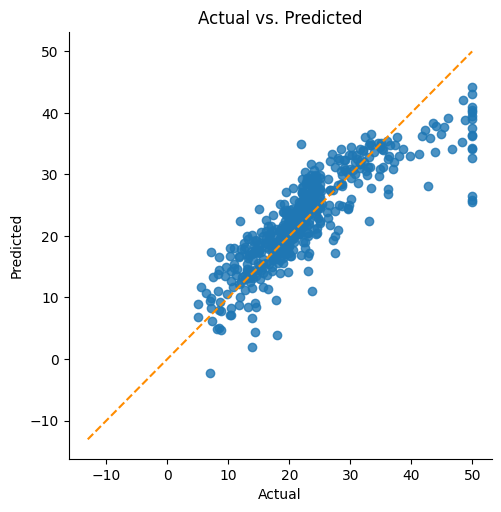

In [ ]:
linear_assumption(model, X, y)

# **II) Normality of the Error Terms**

In [ ]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: normally distributed or not')

    df_results = calculate_residuals(model, features, label)

    print('Using the Anderson-Darling test for normal distribution')

    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)

    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')

    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.histplot(df_results['Residuals'])
    plt.show()

    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

Assumption 2: normally distributed or not
Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 2.5496640572087786e-25
Residuals are not normally distributed


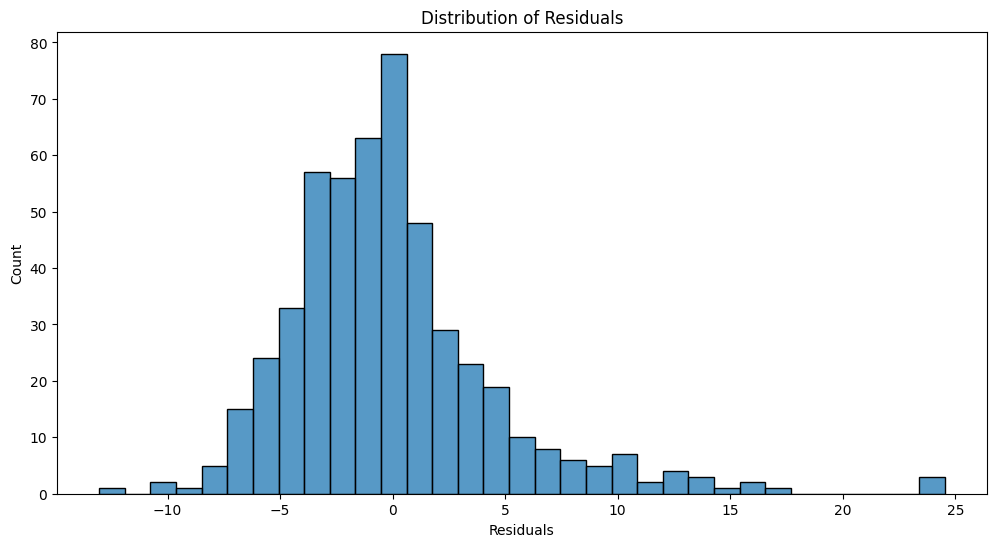


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [ ]:
normal_errors_assumption(model, X, y)

# **III) No Multicollinearity among Predictors**

In [ ]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 3: Little to no multicollinearity')

    plt.figure(figsize = (10,8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()


    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))

    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')


In [ ]:
linear_feature_names = ['X'+str(feature+1) for feature in range(X.shape[1])]

Assumption 3: Little to no multicollinearity


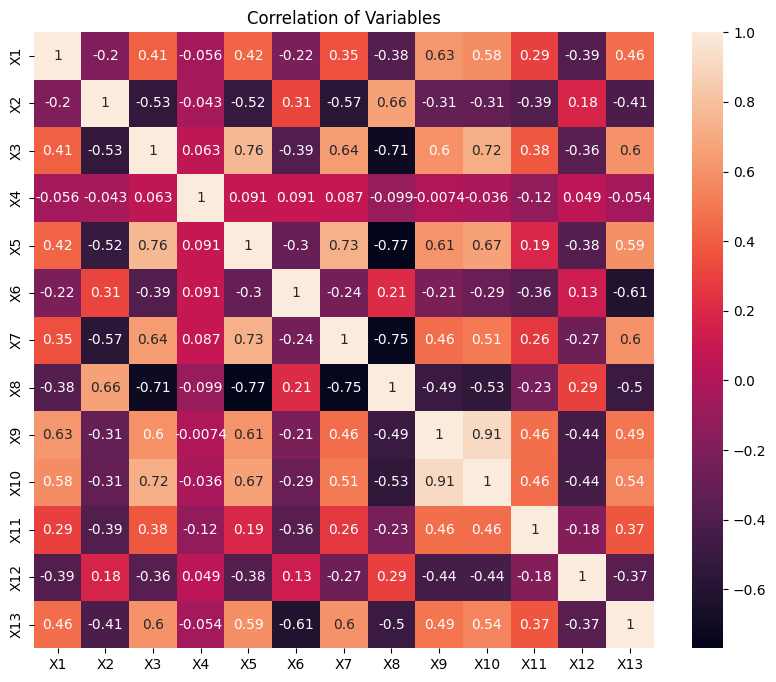

X1: 2.1003728199615233
X2: 2.8440132669462637
X3: 14.485757706539308
X4: 1.1529518589418777
X5: 73.89494652814788
X6: 77.94828304638538
X7: 21.38685048994314
X8: 14.6996523837492
X9: 15.167724857920897
X10: 61.227274009649456
X11: 85.02954731061801
X12: 20.104942636229136
X13: 11.102024772203526

10 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption possibly satisfied

Coefficient interpretability may be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)


In [ ]:
multicollinearity_assumption(model, X, y, linear_feature_names)

# **IV) No Autocorrelation of the Error Terms**

In [ ]:
def autocorrelation_assumption(model, features, label):

    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')

    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

In [ ]:
autocorrelation_assumption(model, X, y)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.0905342453629598
Signs of positive autocorrelation 

Assumption not satisfied


# **V) Homoscedasticity**

In [ ]:
def homoscedasticity_assumption(model, features, label):
    print('Assumption 5: Homoscedasticity')

    df_results = calculate_residuals(model, features, label)

    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()

Assumption 5: Homoscedasticity


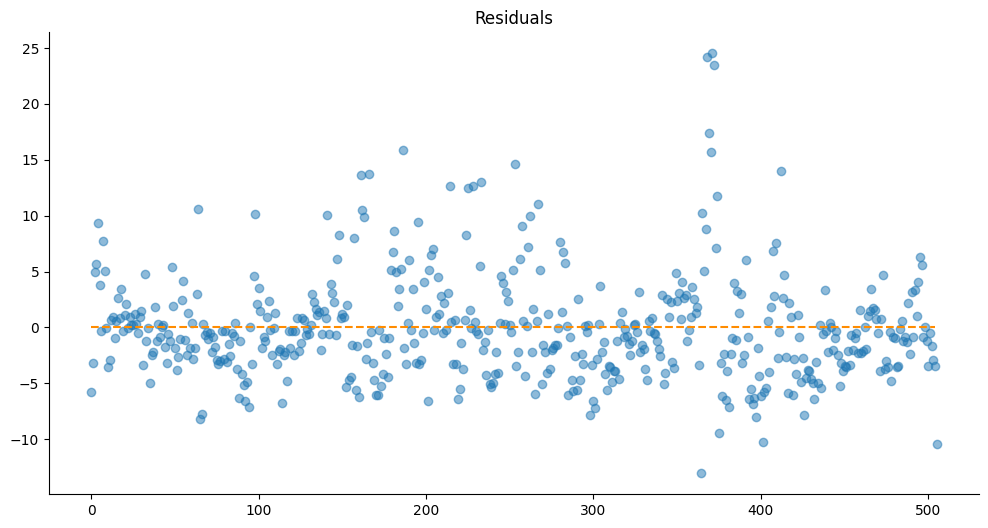

In [ ]:
homoscedasticity_assumption(model, X, y)

# For uploading you need to execute the follwing script

In [ ]:
from google.colab import auth
auth.authenticate_user()
import requests
gcloud_token = !gcloud auth print-access-token
gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
user = gcloud_tokeninfo['email']
import datetime
dt = datetime.datetime.now()
x = str(dt).split('.')[0]
print(f"This Script is executed by: ",user, "at", x)

This Script is executed by:  harsh.jaiswal2023@vitstudent.ac.in at 2024-01-23 17:25:38
